In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('HRdata.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df=pd.DataFrame(data)

In [5]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('\n')

Age
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


DailyRate
691     6
1082    5
329     5
1329    5
530     5
       ..
897     1
891     1
889     1
888     1
102     1
Name: DailyRate, Length: 886, dtype: int64


Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5

Since 'EmployeeCount', 'Over18','StandardsHours' have only one unique , so we can drop it

Since all values in EmployeeNumber is unique, we can drop it

In [6]:
df.drop({'EmployeeCount','EmployeeNumber','Over18','StandardHours'},axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

There are 23 string type columns and 8 integer type columns

In [8]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df.Attrition = le.fit_transform(df.Attrition)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


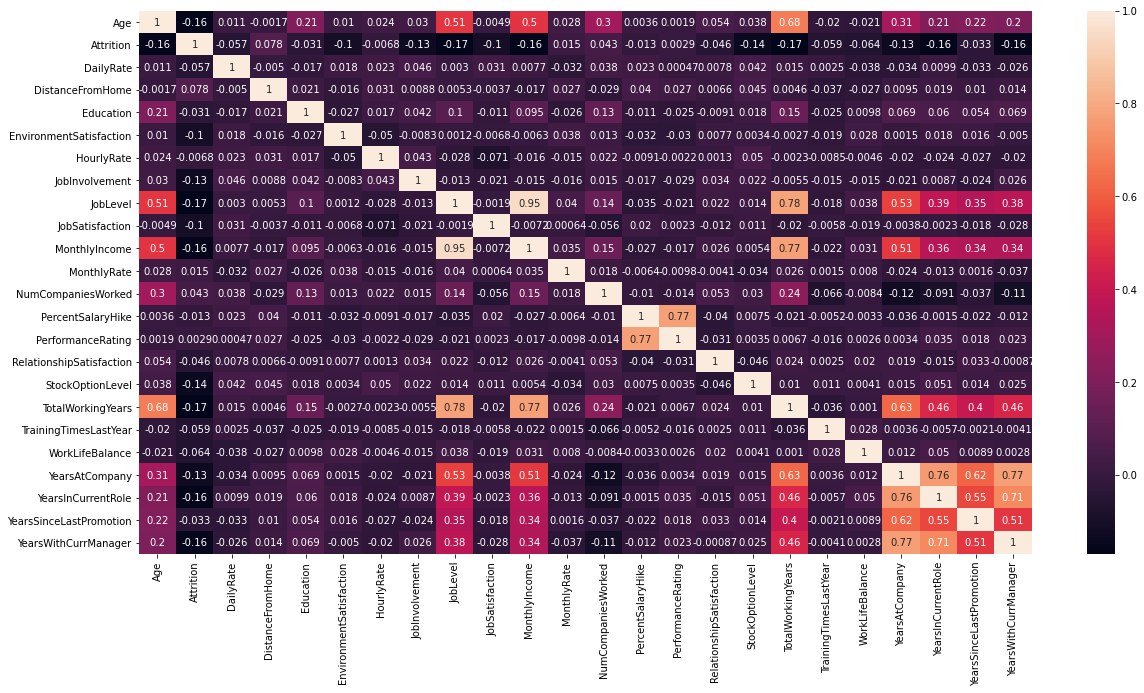

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
df_num=df[['Attrition','Age','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','StockOptionLevel','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']].copy()

In [11]:
df_num

,Attrition,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,1,41,2,3,2,4,5993,0,8,6,4,5
1,0,49,3,2,2,2,5130,1,10,10,7,7
2,1,37,4,2,1,3,2090,0,7,0,0,0
3,0,33,4,3,1,3,2909,0,8,8,7,0
4,0,27,1,3,1,2,3468,1,6,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,3,4,2,4,2571,1,17,5,2,3
1466,0,39,4,2,3,1,9991,1,9,7,7,7
1467,0,27,2,4,2,2,6142,1,6,6,2,3
1468,0,49,4,2,2,2,5390,0,17,9,6,8


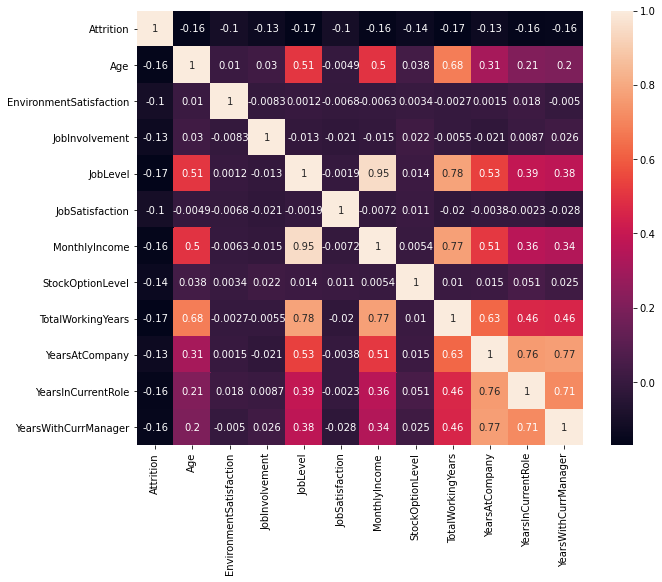

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

'YearATCompany' have good correlation with 'YearsInCurrentRole' & 'YearsWithCurrManager' and lowest correlation with 'Attrition' as compare to both of them. So we can drop it. 'MonthlyIncome'& 'JobLevel' are highly correlated, thus we can drop any one.

In [13]:
df_num.drop('YearsAtCompany',axis=1,inplace=True)

In [14]:
df_num.drop('MonthlyIncome',axis=1,inplace=True)
df_num.head()

,Attrition,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager
0,1,41,2,3,2,4,0,8,4,5
1,0,49,3,2,2,2,1,10,7,7
2,1,37,4,2,1,3,0,7,0,0
3,0,33,4,3,1,3,0,8,7,0
4,0,27,1,3,1,2,1,6,2,2


In [15]:
df_cat=df[['BusinessTravel', 'Department','EducationField','Gender', 'JobRole' , 'MaritalStatus','OverTime']].copy()
df_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [16]:
df_cat=pd.get_dummies(df_cat)

In [17]:
df_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1466,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1467,0,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
1468,0,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [18]:
df_hr=pd.concat([df_num,df_cat],axis=1)
df_hr

,Attrition,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,41,2,3,2,4,0,8,4,5,...,0,0,0,1,0,0,0,1,0,1
1,0,49,3,2,2,2,1,10,7,7,...,0,0,1,0,0,0,1,0,1,0
2,1,37,4,2,1,3,0,7,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,33,4,3,1,3,0,8,7,0,...,0,0,1,0,0,0,1,0,0,1
4,0,27,1,3,1,2,1,6,2,2,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,3,4,2,4,1,17,2,3,...,0,0,0,0,0,0,1,0,1,0
1466,0,39,4,2,3,1,1,9,7,7,...,0,0,0,0,0,0,1,0,1,0
1467,0,27,2,4,2,2,1,6,2,3,...,1,0,0,0,0,0,1,0,0,1
1468,0,49,4,2,2,2,0,17,6,8,...,0,0,0,1,0,0,1,0,1,0


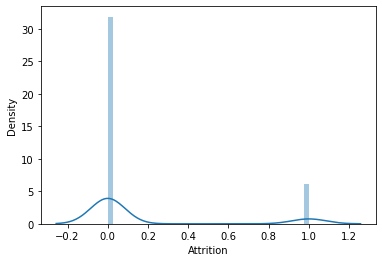

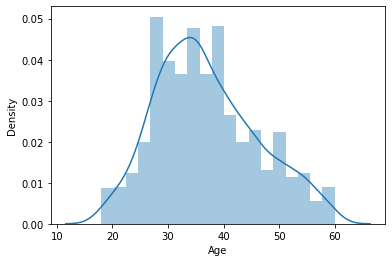

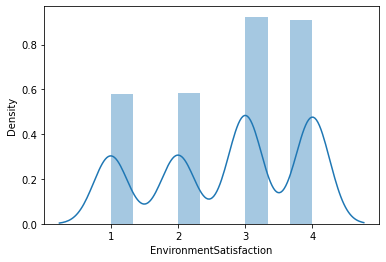

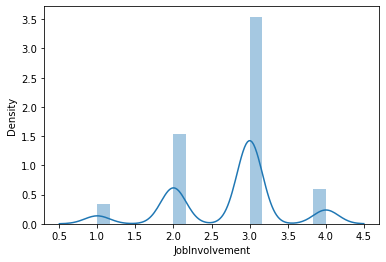

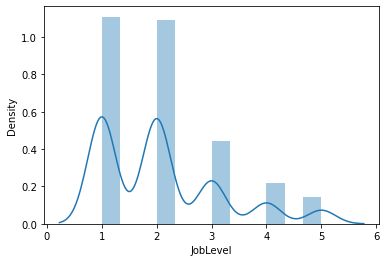

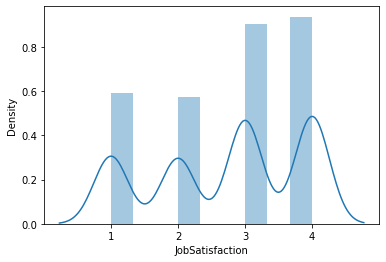

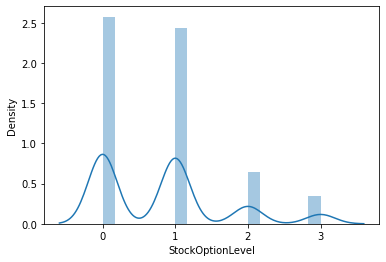

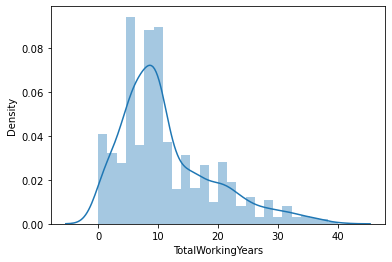

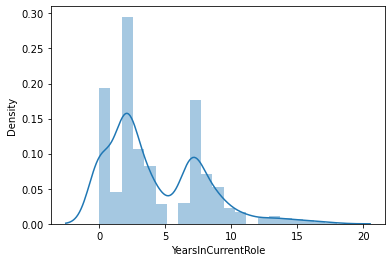

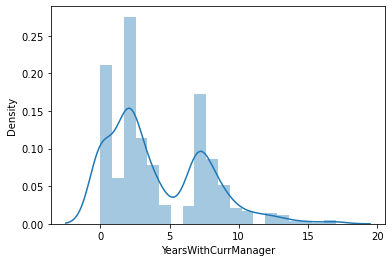

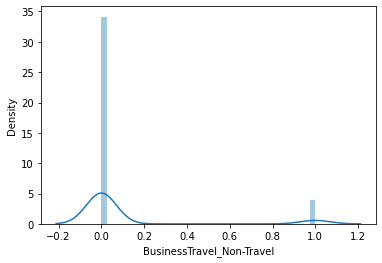

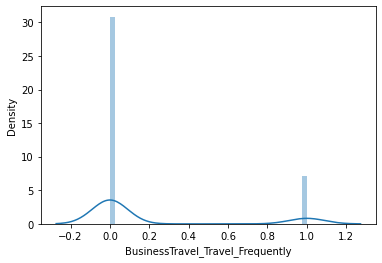

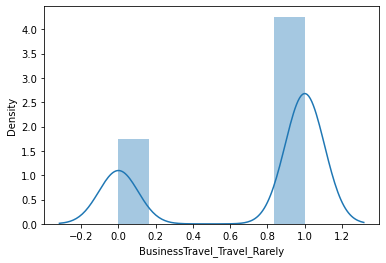

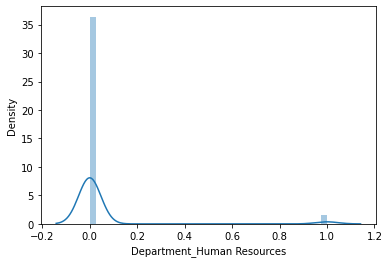

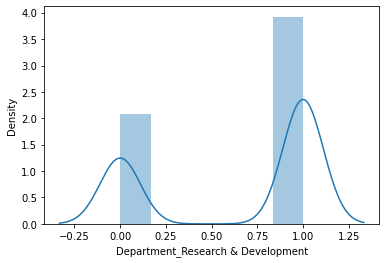

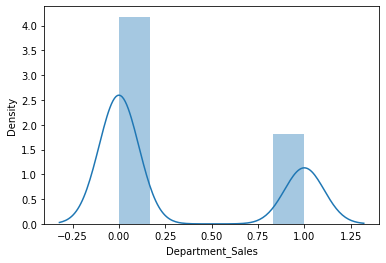

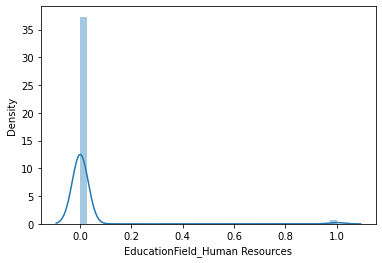

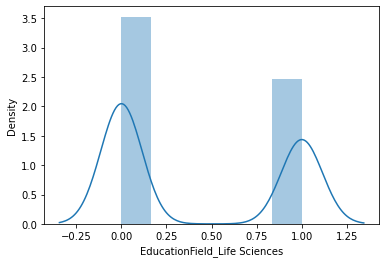

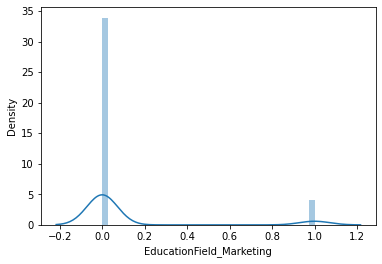

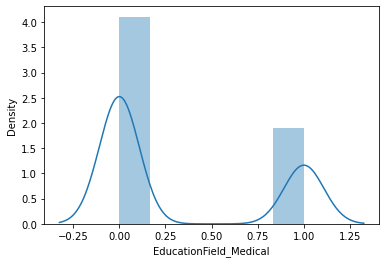

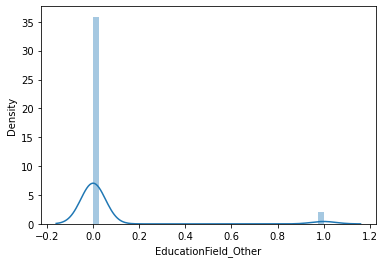

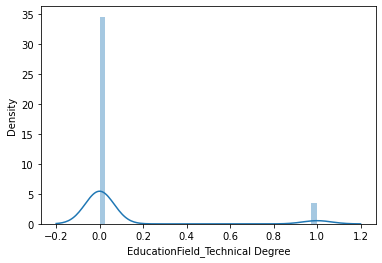

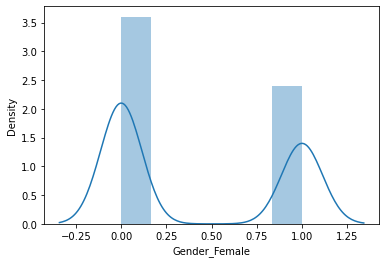

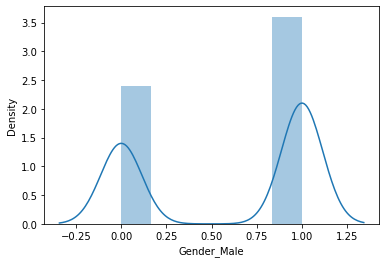

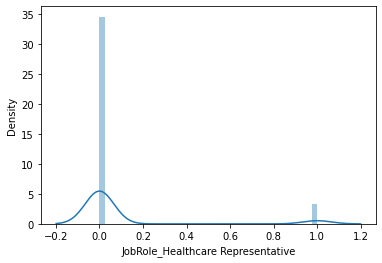

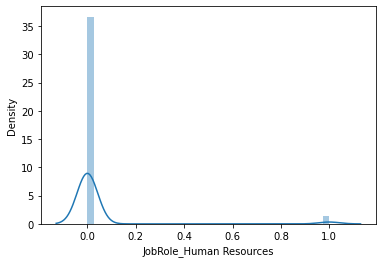

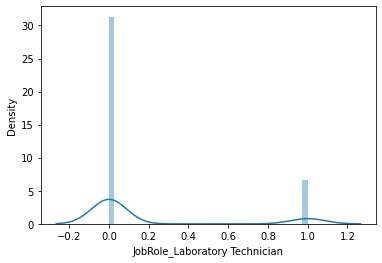

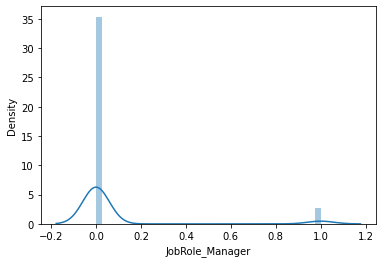

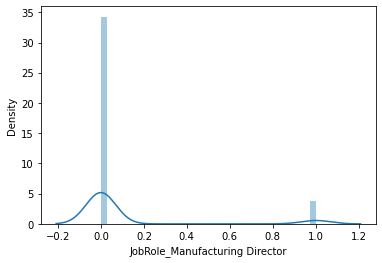

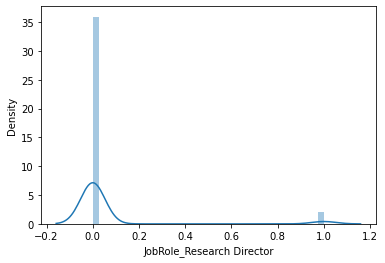

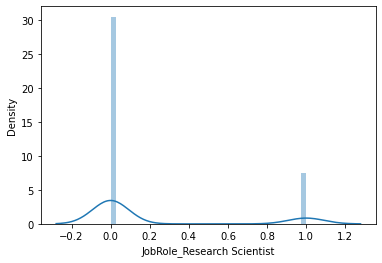

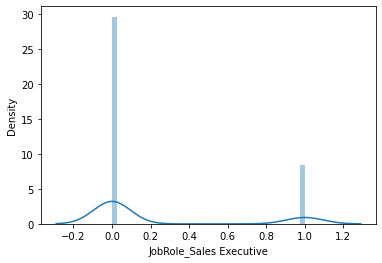

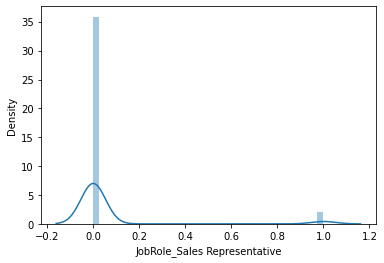

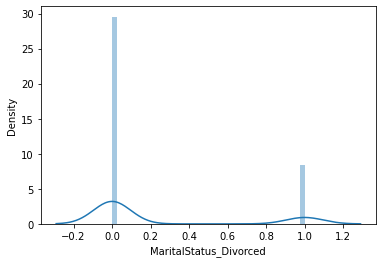

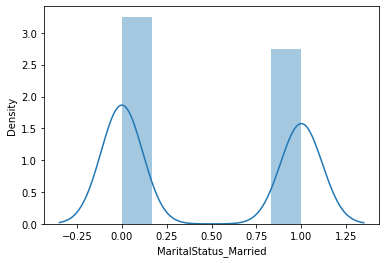

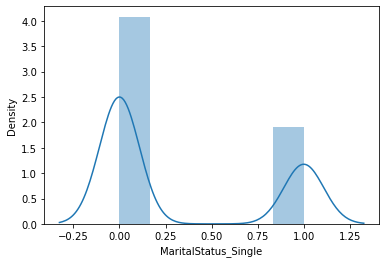

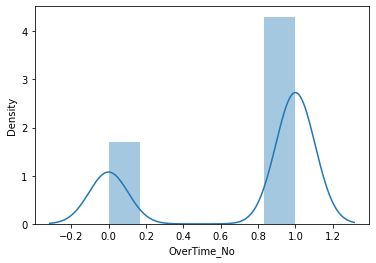

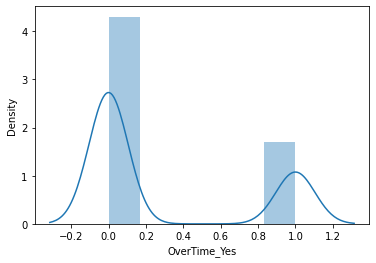

In [19]:
for i in df_hr.columns:
    plt.figure
    sns.distplot(df_hr[i])
    plt.show()

In [20]:
df_hr.dtypes

Attrition                            int32
Age                                  int64
EnvironmentSatisfaction              int64
JobInvolvement                       int64
JobLevel                             int64
JobSatisfaction                      int64
StockOptionLevel                     int64
TotalWorkingYears                    int64
YearsInCurrentRole                   int64
YearsWithCurrManager                 int64
BusinessTravel_Non-Travel            uint8
BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_Human Resources           uint8
Department_Research & Development    uint8
Department_Sales                     uint8
EducationField_Human Resources       uint8
EducationField_Life Sciences         uint8
EducationField_Marketing             uint8
EducationField_Medical               uint8
EducationField_Other                 uint8
EducationField_Technical Degree      uint8
Gender_Female                        uint8
Gender_Male

In [21]:
x=df_hr.drop("Attrition", axis=1)
x

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,StockOptionLevel,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,BusinessTravel_Non-Travel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,2,3,2,4,0,8,4,5,0,...,0,0,0,1,0,0,0,1,0,1
1,49,3,2,2,2,1,10,7,7,0,...,0,0,1,0,0,0,1,0,1,0
2,37,4,2,1,3,0,7,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,33,4,3,1,3,0,8,7,0,0,...,0,0,1,0,0,0,1,0,0,1
4,27,1,3,1,2,1,6,2,2,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,4,2,4,1,17,2,3,0,...,0,0,0,0,0,0,1,0,1,0
1466,39,4,2,3,1,1,9,7,7,0,...,0,0,0,0,0,0,1,0,1,0
1467,27,2,4,2,2,1,6,2,3,0,...,1,0,0,0,0,0,1,0,0,1
1468,49,4,2,2,2,0,17,6,8,0,...,0,0,0,1,0,0,1,0,1,0


In [22]:
x.shape

(1470, 37)

In [23]:
y=df_hr['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [24]:
y.shape

(1470,)

# MODEL SELECTION

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [27]:
model=[DecisionTreeClassifier(), KNeighborsClassifier(), SVC()]
for i in model:
    print(i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('Accuracy score :', accuracy_score(y_test,pred))
    print('Confusion matrix :\n', confusion_matrix(y_test,pred))
    print('Classification report: \n ', classification_report(y_test,pred))
    print('*************************************************')
    print('\n')

DecisionTreeClassifier()
Accuracy score : 0.7755102040816326
Confusion matrix :
 [[215  40]
 [ 26  13]]
Classification report: 
                precision    recall  f1-score   support

           0       0.89      0.84      0.87       255
           1       0.25      0.33      0.28        39

    accuracy                           0.78       294
   macro avg       0.57      0.59      0.57       294
weighted avg       0.81      0.78      0.79       294

*************************************************


KNeighborsClassifier()
Accuracy score : 0.8571428571428571
Confusion matrix :
 [[247   8]
 [ 34   5]]
Classification report: 
                precision    recall  f1-score   support

           0       0.88      0.97      0.92       255
           1       0.38      0.13      0.19        39

    accuracy                           0.86       294
   macro avg       0.63      0.55      0.56       294
weighted avg       0.81      0.86      0.82       294

************************************

# ENSEMBLE

In [28]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,pred))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print('Classification report',classification_report(y_test,pred))

Accuracy Score: 0.8673469387755102
Confusion matrix: [[255   0]
 [ 39   0]]
Classification report               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



# CROSS VALIDATION

In [29]:
for i in model:
    cross=cross_val_score(i,x,y,cv=5)
    print(i)
    print('Score:',cross)
    print('Mean_score:',cross.mean())
    print('STD_score:',cross.std())
    print('****************************/n')

DecisionTreeClassifier()
Score: [0.81292517 0.82653061 0.79931973 0.74489796 0.82653061]
Mean_score: 0.8020408163265307
STD_score: 0.03030075843717018
****************************/n
KNeighborsClassifier()
Score: [0.81292517 0.84693878 0.85034014 0.83333333 0.84693878]
Mean_score: 0.8380952380952381
STD_score: 0.013874883030184445
****************************/n
SVC()
Score: [0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
Mean_score: 0.8387755102040817
STD_score: 0.0016663195529137286
****************************/n


In [30]:
cross=cross_val_score(rf,x,y,cv=5)
print('RandomForestClassifier()')
print('Score:',cross)
print('Mean_score:',cross.mean())
print('STD_score:',cross.std())
print('****************************/n')

RandomForestClassifier()
Score: [0.83673469 0.86394558 0.86394558 0.85714286 0.86734694]
Mean_score: 0.8578231292517007
STD_score: 0.011053113475695153
****************************/n


# HYPERPARAMETER TUNING

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,10]}
knc=KNeighborsClassifier()
Grid=GridSearchCV(knc,parameters)
Grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 10]})

In [32]:
Grid.best_params_

{'n_neighbors': 10}

In [33]:
knc2=KNeighborsClassifier(n_neighbors=10)
knc2.fit(x_train,y_train)
pred=knc2.predict(x_test)
print('Accuracy score :', accuracy_score(y_test,pred))
print('Confusion matrix :\n', confusion_matrix(y_test,pred))
print('Classification report: \n ', classification_report(y_test,pred))

Accuracy score : 0.8741496598639455
Confusion matrix :
 [[254   1]
 [ 36   3]]
Classification report: 
                precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



# SAVING THE BEST MODEL

In [34]:
import joblib
joblib.dump(knc2,'HR_analytics.pkl')

['HR_analytics.pkl']